In [8]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub

In [9]:
bert_encoder_url="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_preprocess_url="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [24]:
#bert_preprocess_model=hub.KerasLayer(bert_preprocess_url)
bert_preprocess_model=hub.KerasLayer('bert_en_uncased_preprocess_3')
#bert_encoder_model=hub.KerasLayer(bert_encoder_url)
bert_encoder_model=hub.KerasLayer('bert_en_uncased_L-12_H-768_A-12_4')

In [40]:
reviews =["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.","i do not like the last part of the movie"]

In [41]:
processed_text=bert_preprocess_model(reviews)

In [42]:
processed_text.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [44]:
processed_text['input_word_ids'][0]

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  2028,  1997,  1996,  2060, 15814,  2038,  3855,  2008,
        2044,  3666,  2074,  1015, 11472,  2792,  2017,  1005,  2222,
        2022, 13322,  1012,  2027,  2024,  2157,  1010,  2004,  2023,
        2003,  3599,  2054,  3047,  2007,  2033,  1012,  1026,  7987,
        1013,  1028,  1026,  7987,  1013,  1028,  1996,  2034,  2518,
        2008,  4930,  2033,  2055, 11472,  2001,  2049, 24083,  1998,
        4895, 10258,  2378,  8450,  5019,  1997,  4808,  1010,  2029,
        2275,  1999,  2157,  2013,  1996,  2773,  2175,  1012,  3404,
        2033,  1010,  2023,  2003,  2025,  1037,  2265,  2005,  1996,
        8143, 18627,  2030,  5199,  3593,  1012,  2023,  2265,  8005,
        2053, 17957,  2007, 12362,  2000,  5850,  1010,  3348,  2030,
        4808,  1012,  2049,  2003, 13076,  1010,  1999,  1996,  4438,
        2224,  1997,  1996,  2773,  1012,  1026,  7987,  1013,  1028,
        1026,  7987,  1013,  1028,  2009,  2

In [28]:
encoded_text=bert_encoder_model(processed_text)

In [29]:
encoded_text.keys()

dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

In [30]:
encoded_text['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.86172384, -0.30019632, -0.43665376, ..., -0.20322746,
        -0.562812  ,  0.87094474],
       [-0.83645123, -0.28620818,  0.18301775, ...,  0.35978758,
        -0.5632274 ,  0.8779379 ]], dtype=float32)>

In [33]:
encoded_text['sequence_output'][0][0]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([ 5.30457906e-02,  6.14858977e-02,  8.62417892e-02, -7.81071484e-02,
       -1.30853087e-01, -6.41600430e-01,  1.06077485e-01,  6.70726001e-01,
        1.77621663e-01, -3.70985001e-01,  9.91099104e-02, -5.50166517e-02,
        3.62060905e-01,  4.77545232e-01,  1.94999546e-01,  1.27746344e-01,
       -2.50196159e-01,  5.39256394e-01,  3.20542872e-01, -2.61821449e-01,
       -2.93204308e-01, -2.71295935e-01, -3.23616639e-02, -1.58299655e-01,
        3.09311226e-03,  1.32513419e-02, -1.29775614e-01, -2.21350100e-02,
        1.27171978e-01, -2.77723446e-02, -1.31884497e-02,  2.32451484e-01,
       -4.81601626e-01,  1.90082431e-01,  3.07142548e-02, -2.75524199e-01,
        2.11713746e-01,  6.21539727e-03, -1.12987190e-01, -2.34742407e-02,
       -3.26321125e-02,  2.03262389e-01,  6.30135983e-02,  8.44410285e-02,
       -4.75744456e-02, -3.07635069e-01, -2.55594110e+00, -8.92916024e-02,
        3.72710451e-02, -5.54197788e-01,  4.14193451

In [38]:
encoded_text['encoder_outputs'][-1]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.05304579,  0.0614859 ,  0.08624179, ..., -0.22751051,
          0.47548395,  0.12843008],
        [ 0.47046626, -0.05699513, -0.3709426 , ..., -0.20840652,
          1.0462556 ,  0.20479555],
        [ 0.38208592,  0.17891465, -0.03811961, ..., -0.67165154,
          0.49275514, -0.2130884 ],
        ...,
        [ 0.2640902 ,  0.05137955,  0.48115087, ...,  0.24334165,
          0.14693391,  0.02800762],
        [ 0.34723312, -0.10023018,  0.4984259 , ...,  0.3018473 ,
          0.24262977, -0.12347432],
        [ 0.22551095,  0.04183995,  0.5630046 , ...,  0.2628521 ,
          0.10939378, -0.04718736]],

       [[ 0.36131206, -0.01128329,  0.3242863 , ..., -0.04654211,
          0.40982947,  0.0444705 ],
        [ 0.2248976 , -0.02566834, -0.01634575, ..., -0.53965443,
          0.873898  ,  0.15155746],
        [ 0.02061738,  0.24696551,  0.16240554, ..., -0.52075714,
          0.28469613, -0.25185913],
        ...,

In [39]:
import pandas as pd

In [45]:
df=pd.read_csv('dataset.csv')

In [47]:
df.sample(10)


,review,sentiment
203,I absolutely love this film. Everything about ...,positive
32680,I usually like movies about animals or reptile...,negative
1500,"Oh dear god. This was horrible. There is bad, ...",negative
8441,This remarkable film can be summed up very eas...,positive
17972,I went along to this movie with some trepidati...,negative
5452,"""On a Clear Day You Can See Forever"" is nothin...",negative
37916,whomever thought of having sequels to Iron Eag...,negative
45863,"Loved the original story, had very high expect...",negative
28673,"Now, the sci-fi channel original company has m...",positive
48596,"Notwithstanding that ""The House of Adam"" is me...",negative


In [48]:
df['output']=df['sentiment'].apply(lambda x : 1 if x=='positive' else 0)

In [49]:
df.sample(10)

,review,sentiment,output
28831,Not a box office success; no-one really knows ...,positive,1
17508,The Hindi version of the film is 121 minutes. ...,positive,1
34650,"""I fear you speak upon the rack, where men enf...",positive,1
34449,I know one is not supposed to comment on other...,positive,1
45350,'Nemesis' was the last book to feature Miss Ma...,positive,1
29866,The excruciatingly slow pace of this film was ...,negative,0
40016,"Having already seen the original ""Jack Frost"",...",negative,0
27210,"""The New hope of Romanian cinema""...if this is...",negative,0
7982,"I do not envy Barry Levinson, Rachel Weisz, Be...",negative,0
10414,"Here's a well-made war story, nicely shot and ...",positive,1


In [50]:
df.groupby('output').describe()

review                                                                 \
        count unique                                                top freq   
output                                                                         
0       25000  24698  This show comes up with interesting locations ...    3   
1       25000  24884  Loved today's show!!! It was a variety and not...    5   

       sentiment                          
           count unique       top   freq  
output                                    
0          25000      1  negative  25000  
1          25000      1  positive  25000

In [51]:
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

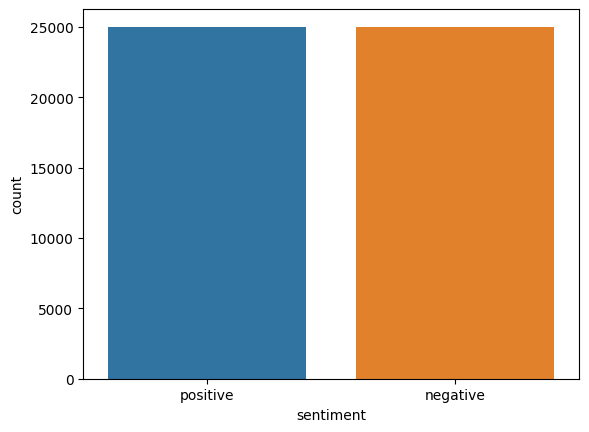

In [53]:
sns.countplot(x=df['sentiment'])

In [58]:
positive_reviews=df[df['sentiment']=='positive']
negative_reviews=df[df['sentiment']=='negative']

In [60]:
positive_reviews_100= positive_reviews.sample(100)
negative_reviews_100= positive_reviews.sample(100)

In [61]:
df_200= pd.concat([positive_reviews_100, negative_reviews_100])

In [62]:
df_200.shape

(200, 3)

In [54]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(
    df_200['review'], 
    df_200['output'],
    stratify=df_200['output'],
    test_size=0.2
    )

In [93]:
input_layer = tf.keras.layers.Input(shape=(), name="input", dtype=tf.dtypes.string)
preprocess_layer=bert_preprocess_model(input_layer)
encoder_layer = bert_encoder_model(preprocess_layer)
dropout_layer = tf.keras.layers.Dropout(rate=0.1, name ='dropout')(encoder_layer['pooled_output'])
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name = 'output')(dropout_layer)
model = tf.keras.Model(inputs = [input_layer], outputs=[output_layer])

In [94]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None,)]            0           []                               
                                                                                                  
 keras_layer_3 (KerasLayer)     {'input_type_ids':   0           ['input[0][0]']                  
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [72]:
metrics=[
    tf.keras.metrics.BinaryAccuracy(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall()
    ]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= metrics)

In [91]:
history=model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=10)

Epoch 1/10
13/13 [==============================] - 17s 1s/step - loss: 0.0230 - binary_accuracy: 0.9922 - precision_1: 1.0000 - recall: 0.9922 - val_loss: 0.0143 - val_binary_accuracy: 1.0000 - val_precision_1: 1.0000 - val_recall: 1.0000
Epoch 2/10
13/13 [==============================] - 15s 1s/step - loss: 0.0143 - binary_accuracy: 0.9922 - precision_1: 1.0000 - recall: 0.9922 - val_loss: 0.0113 - val_binary_accuracy: 1.0000 - val_precision_1: 1.0000 - val_recall: 1.0000
Epoch 3/10
13/13 [==============================] - 15s 1s/step - loss: 0.0127 - binary_accuracy: 0.9922 - precision_1: 1.0000 - recall: 0.9922 - val_loss: 0.0095 - val_binary_accuracy: 1.0000 - val_precision_1: 1.0000 - val_recall: 1.0000
Epoch 4/10
13/13 [==============================] - 15s 1s/step - loss: 0.0108 - binary_accuracy: 0.9922 - precision_1: 1.0000 - recall: 0.9922 - val_loss: 0.0075 - val_binary_accuracy: 1.0000 - val_precision_1: 1.0000 - val_recall: 1.0000
Epoch 5/10
13/13 [======================

In [75]:
y_predicted = model.predict(x_test)

2/2 [==============================] - 7s 2s/step


In [76]:
import numpy as np
y_predicted = np.where(y_predicted>0.5,1,0)

In [77]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 5s 3s/step - loss: 0.0063 - binary_accuracy: 1.0000 - precision_1: 1.0000 - recall: 1.0000


[0.006298627704381943, 1.0, 1.0, 1.0]

In [86]:
review=['Bad','i enjoy the movie']

In [90]:
res=model.predict(review)
res

1/1 [==============================] - 1s 583ms/step


array([[0.94391465],
       [0.9592807 ]], dtype=float32)

In [88]:
res=np.where(res>0.5,1,0)

In [89]:
res

array([[1],
       [1]])